<a href="https://colab.research.google.com/github/Anshuman-37/MLIS_Project_Ideal/blob/main/Main_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is the main jupyter notebook for the coursework of MLIS 
## Grp 1A 
## Authors
## Alpaslan Erdag , Anshuman Singh , Yixin Fan
## Date - 15/01/2022

# <center> Abstract </center>
​
 Todo - Write some abstract about the data giving some information about
 
 The data is obtanined from UCI repository which can be obtained from the [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)



In [2]:
# Also should we show this ? tell me your thoughts
# about_data ='/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.names'
about_data = '/content/breast-cancer-wisconsin.names'
with open(about_data) as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

<h1><center> About code (Suggest a good heading) </center></h1>

## The code is divided in the following modules
&emsp; <li> Data Cleaning and Data Preprocessing </li> 
&emsp; <li> Model Fiting on the clean data </li> 
&emsp; <li> Model Accuracy </li>

<h2>Data Cleaning and Data Preprocessing</h2>

<p>To get a good result over model accuracies we are going to first clean the data and then used the cleaned and preprocessed data to train a model. </p>

<p> We will be using a systematic approach to clean our data. That will be listed in the following steps</p>
&emsp; <li>Data Visulaization</li>
&emsp; <li>Checking and Removing nan values</li>
&emsp; <li>Removing Useless Attributes</li>
&emsp; <li>Deleting Outliers and Data Normalizations</li>

<h3> Data Visualization </h3>

In [3]:
## Header Files 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import scipy

## Loading Data 
#data = '/Users/anshuman/Desktop/Project_Folder/MLIS_Project_Ideal/breast-cancer-wisconsin.data'
data = '/content/breast-cancer-wisconsin.data'

In [4]:
col_name = ['Samplecodenumber','ClumpThickness','UniformityofCellSize','UniformityofCellShape',
            'MarginalAdhesion','SingleEpithelialCellSize','BareNuclei',
            'BlandChromatin','NormalNucleoli','Mitoses','Class']
cancerdata = pd.read_csv(data,low_memory=False,names=col_name)
cancerdata.head()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
## Removing attribute that is of no use
cancerdata = cancerdata.drop(['Samplecodenumber'], 1)

In [6]:
# The number of samples present by class count
cancerdata['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
# Making the class counts to similar size
Benign = cancerdata[(cancerdata.Class == 2) ].sample(240).index
Malignant = cancerdata[(cancerdata.Class == 4) ].sample(240).index
cancer = cancerdata.loc[Benign|Malignant]
cancer = cancer.reset_index(drop=True)

# Making the classess from 2/4 to 0/1 
cancer['classes'] = cancer.Class.map({2:0,4:1})
cancer = cancer.drop(['Class'], 1)

# Printing the updated dataframe
cancer.head()

,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,classes
0,6,8,8,1,3,4,3,7,1,0
1,4,1,1,3,2,1,3,1,1,0
2,8,10,10,8,7,10,9,7,1,1
3,2,1,2,1,2,1,3,1,1,0
4,5,3,3,3,2,3,4,4,1,1


In [8]:
# Confirming that counts of the classes are similar 
cancer['classes'].value_counts()


1    240
0    240
Name: classes, dtype: int64

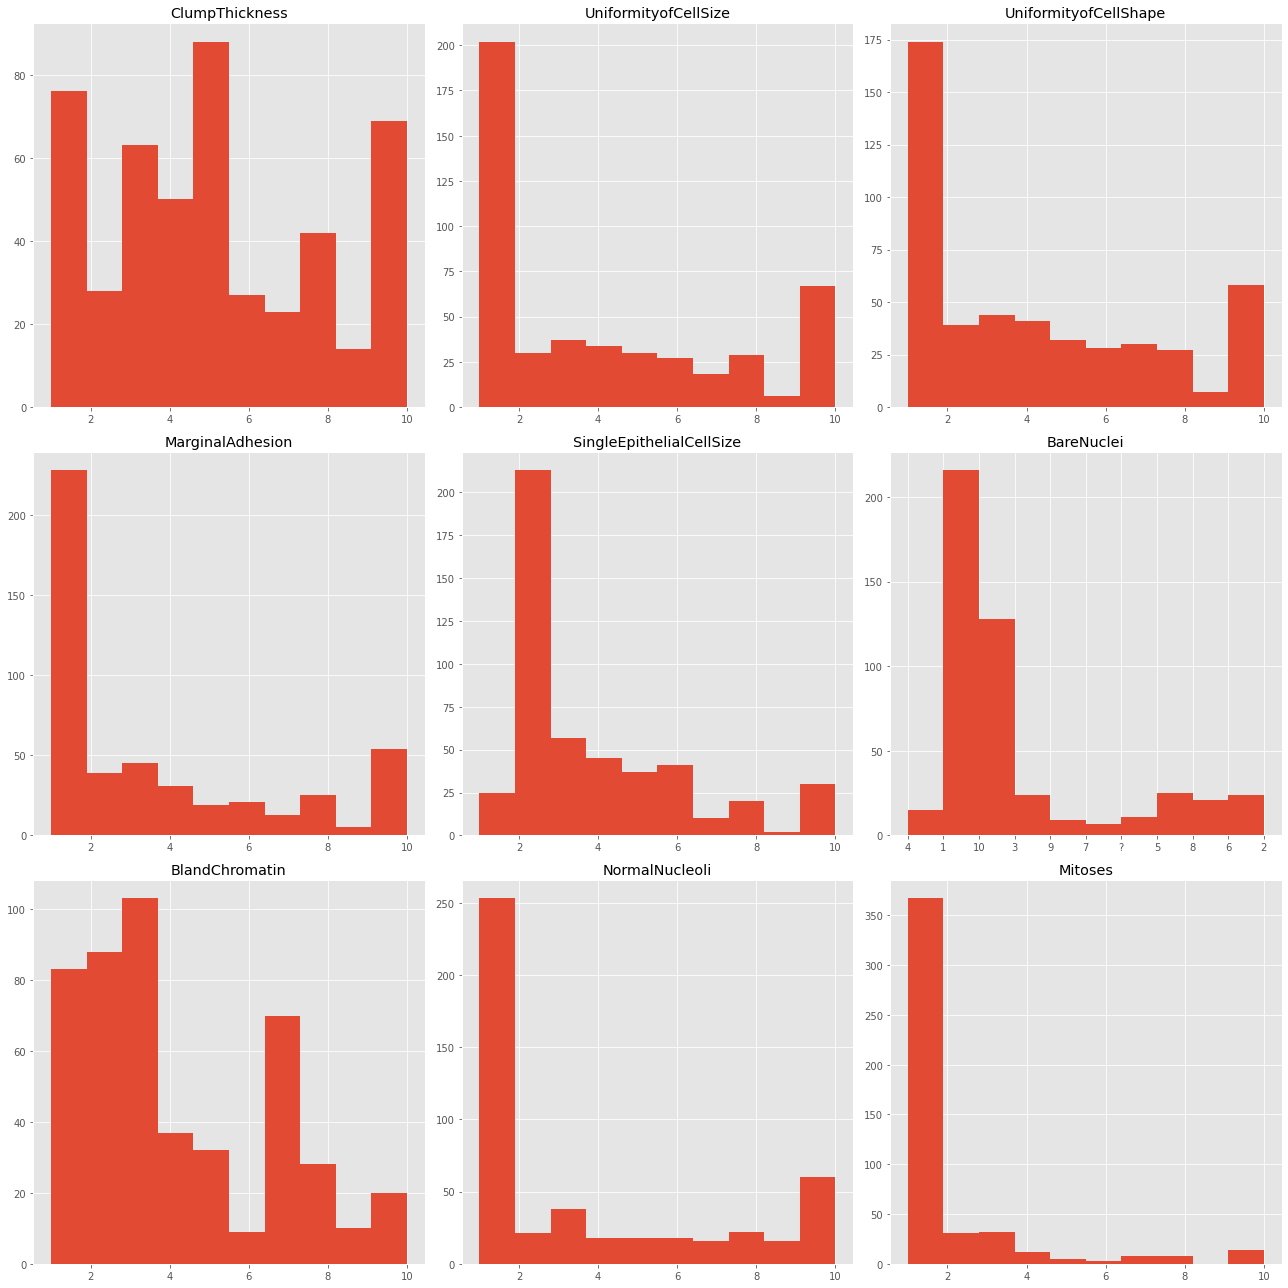

In [9]:
# plot date variables and find the variables with similar distributions, keep only one of them.
#['ClumpThickness','UniformityofCellSize','UniformityofCellShape','MarginalAdhesion',
#'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']
fig, axs = plt.subplots(3, 3, figsize=(18,18))
axs[0,0].hist(cancer['ClumpThickness'])
axs[0,0].set_title("ClumpThickness")
axs[0,1].hist(cancer['UniformityofCellSize'])
axs[0,1].set_title("UniformityofCellSize")
axs[0,2].hist(cancer['UniformityofCellShape'])
axs[0,2].set_title("UniformityofCellShape")
axs[1,0].hist(cancer['MarginalAdhesion'])
axs[1,0].set_title("MarginalAdhesion")
axs[1,1].hist(cancer['SingleEpithelialCellSize'])
axs[1,1].set_title("SingleEpithelialCellSize")
axs[1,2].hist(cancer['BareNuclei'])
axs[1,2].set_title("BareNuclei")
axs[2,0].hist(cancer['BlandChromatin'])
axs[2,0].set_title("BlandChromatin")
axs[2,1].hist(cancer['NormalNucleoli'])
axs[2,1].set_title("NormalNucleoli")
axs[2,2].hist(cancer['Mitoses'])
axs[2,2].set_title("Mitoses")
fig.tight_layout()

<h3>Checking and Removing nan values</h3>

In [10]:
## TODO 
## Yixin remove the wasted steps from the code and only keep the most important data cleaning steps
cancer.dtypes.value_counts()

int64     9
object    1
dtype: int64

In [11]:
cancer.select_dtypes('object')

,BareNuclei
0,4
1,1
2,10
3,1
4,3
...,...
475,1
476,1
477,3
478,4


In [12]:
cancer = cancer.replace('?' ,np.nan)

##Finding the the count and percentage of values that are missing in the dataframe.
null1 = pd.DataFrame({'Count': cancer.isnull().sum(), 'Percent': 100*cancer.isnull().sum()/len(cancer)})

##printing columns with null count more than 0
null1[null1['Count'] > 0]

,Count,Percent
BareNuclei,11,2.291667


In [13]:
## Filling the columns with nan values with mean of the data
cancer["BareNuclei"]=cancer["BareNuclei"].astype(float)
cancer=cancer.fillna(cancer.mean())

<h3> Removing Useless Attributes </h3>

In [14]:
corr_list1=cancer.corr()['classes'].abs().sort_values(ascending=False)
corr_list_new=corr_list1[corr_list1>0.01].index.values.tolist()
corr_list1
cancer=cancer[corr_list_new]
cancer.head(3)

,classes,BareNuclei,UniformityofCellShape,UniformityofCellSize,BlandChromatin,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,4.0,8,8,3,6,7,1,3,1
1,0,1.0,1,1,3,4,1,3,2,1
2,1,10.0,10,10,9,8,7,8,7,1


In [15]:
## To remove outliers first we have to find the correlation between attributes

#find the variables with high correlations
cor1 = cancer.corr().abs()
list1 = cor1.stack().sort_values(ascending=False).drop_duplicates()  
high_corr= list1[list1>0.70].index.values.tolist()
high_corr.remove(high_corr[0])

display(list1)

Mitoses                   Mitoses                     1.000000
UniformityofCellShape     UniformityofCellSize        0.893619
BareNuclei                classes                     0.795852
UniformityofCellShape     classes                     0.785223
UniformityofCellSize      classes                     0.784300
classes                   BlandChromatin              0.736972
BlandChromatin            UniformityofCellSize        0.733414
SingleEpithelialCellSize  UniformityofCellSize        0.731913
ClumpThickness            classes                     0.714434
UniformityofCellShape     BlandChromatin              0.710825
SingleEpithelialCellSize  UniformityofCellShape       0.693375
UniformityofCellSize      NormalNucleoli              0.683436
UniformityofCellShape     NormalNucleoli              0.682525
classes                   NormalNucleoli              0.676762
UniformityofCellSize      MarginalAdhesion            0.673015
UniformityofCellShape     BareNuclei                  0

In [16]:
# for variable pairs with high correlation, keep only one of them
columnlist=list(cancer.columns)
len(high_corr)
for i in range(len(high_corr)):
    if "classes" in high_corr[i]:
        columnlist=columnlist
    else:
        if high_corr[i][0] in columnlist and high_corr[i][1] in columnlist:
            columnlist.remove(high_corr[i][1])
        else:
            columnlist=columnlist
cancer_final=cancer[columnlist]

In [17]:
## Doing a test train split on the data 
import random
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(cancer_final,random_state=None, shuffle=True)
train_x=training_data.drop(['classes'], 1) 
train_y=training_data[['classes']]
test_x=test_data.drop(['classes'], 1)
test_y=test_data[['classes']]

<h3>Deleting Outliers and Data Normalizations</h3>

In [18]:
# Remove outliers
cancer_norm = cancer_final[(np.abs(scipy.stats.zscore(cancer_final)) < 3).all(axis=1)]
# Zero mean normalisation
cancer_norm.iloc[:,1:]=(cancer_norm.iloc[:,1:]-cancer_norm.iloc[:,1:].mean())/cancer_norm.iloc[:,1:].std()

In [19]:
cancer_norm.head()

,classes,BareNuclei,UniformityofCellShape,ClumpThickness,NormalNucleoli,MarginalAdhesion,SingleEpithelialCellSize,Mitoses
0,0,-0.107663,1.331662,0.360311,1.094461,-0.755453,-0.239672,-0.404425
1,0,-0.883759,-0.928427,-0.324429,-0.728314,-0.103857,-0.677003,-0.404425
2,1,1.444530,1.977402,1.045051,1.094461,1.525133,1.509650,-0.404425
3,0,-0.883759,-0.605557,-1.009170,-0.728314,-0.755453,-0.677003,-0.404425
4,1,-0.366361,-0.282687,0.017941,0.183074,-0.103857,-0.677003,-0.404425


In [20]:
#split the new dataset
training_data_norm, test_data_norm = train_test_split(cancer_norm,random_state=None, shuffle=True)
train_x_norm=training_data_norm.drop(['classes'], 1) 
train_y_norm=training_data_norm[['classes']]
test_x_norm=test_data_norm.drop(['classes'], 1)
test_y_norm=test_data_norm[['classes']]

In [21]:
x_train = np.array(train_x_norm)
print(x_train.shape)
y_train = np.array(train_y_norm)
print(y_train.shape)
x_test = np.array(test_x_norm)
print(x_test.shape)
y_test = np.array(test_y_norm)
print(y_test.shape)

(343, 7)
(343, 1)
(115, 7)
(115, 1)


## Accuracy Plots and Stuff 


In [25]:
import Sgd_classifier as classfier_1
alpha=0.0001
eta0=0.01
N=len(x_train)
epochs=75
p = 2
w,b,train_loss,test_loss=classfier_1.train(x_train,y_train,x_test,y_test,epochs,alpha,eta0,p)


 27%|██▋       | 20/75 [00:00<00:00, 96.11it/s]


-- Epoch no(iteration no)  1 
 Train data set : 
W intercept: [0.10334963 0.07864982 0.07710073 0.08272052 0.06774194 0.06944384
 0.05588821], B intercept: -0.003385430298783861, Train loss: 0.23176710671679407, Test loss: 0.22658750858613938

-- Epoch no(iteration no)  2 
 Train data set : 
W intercept: [0.18402278 0.15779787 0.13677143 0.14599613 0.11567834 0.14485151
 0.09000534], B intercept: -0.017406973084879537, Train loss: 0.18707773286255644, Test loss: 0.17792637712203876

-- Epoch no(iteration no)  3 
 Train data set : 
W intercept: [0.2386244  0.21808585 0.19673519 0.17918261 0.15803075 0.18304128
 0.12115734], B intercept: -0.02013393207714934, Train loss: 0.16116655307535221, Test loss: 0.14944309083338686

-- Epoch no(iteration no)  4 
 Train data set : 
W intercept: [0.29200253 0.27290761 0.24733128 0.21701621 0.19440262 0.21947877
 0.14406874], B intercept: -0.03139606404217868, Train loss: 0.14129939678598688, Test loss: 0.12734798393799934

-- Epoch no(iteration no)

 40%|████      | 30/75 [00:00<00:00, 89.28it/s]


-- Epoch no(iteration no)  22 
 Train data set : 
W intercept: [0.72318847 0.6182488  0.57735668 0.45746    0.47119697 0.43247377
 0.27134866], B intercept: 0.03489785749109507, Train loss: 0.07085833194997508, Test loss: 0.05075842882202565

-- Epoch no(iteration no)  23 
 Train data set : 
W intercept: [0.72785178 0.62196389 0.58541022 0.46820256 0.48679048 0.4347056
 0.28397294], B intercept: 0.010664697513184423, Train loss: 0.07020323634716139, Test loss: 0.04980537508154308

-- Epoch no(iteration no)  24 
 Train data set : 
W intercept: [0.7385831  0.63186238 0.58932109 0.49343307 0.48904062 0.44469146
 0.28621312], B intercept: 0.030923264248844146, Train loss: 0.06912881550072417, Test loss: 0.04884469444220087

-- Epoch no(iteration no)  25 
 Train data set : 
W intercept: [0.74755198 0.64360647 0.59323185 0.50302394 0.50969649 0.45862236
 0.28772923], B intercept: 0.031207501765054223, Train loss: 0.06815456735205261, Test loss: 0.04790391481196416

-- Epoch no(iteration no)

 65%|██████▌   | 49/75 [00:00<00:00, 84.75it/s]


-- Epoch no(iteration no)  38 
 Train data set : 
W intercept: [0.88774725 0.73700562 0.70585232 0.56144608 0.57047728 0.49934737
 0.33419631], B intercept: 0.0799883168319733, Train loss: 0.060688289549036246, Test loss: 0.03987455623280959

-- Epoch no(iteration no)  39 
 Train data set : 
W intercept: [0.8937729  0.74306101 0.70983099 0.5652739  0.58114658 0.50792763
 0.34371842], B intercept: 0.08882355874040827, Train loss: 0.060235434903127154, Test loss: 0.03949935941931985

-- Epoch no(iteration no)  40 
 Train data set : 
W intercept: [0.90387771 0.75334753 0.71505172 0.5755076  0.58966171 0.51387436
 0.34716598], B intercept: 0.09553018631877769, Train loss: 0.05971449210414561, Test loss: 0.03901041441962052

-- Epoch no(iteration no)  41 
 Train data set : 
W intercept: [0.91569458 0.76058883 0.72370146 0.57666296 0.59257692 0.52817653
 0.34466483], B intercept: 0.10439794058364155, Train loss: 0.05924805843468695, Test loss: 0.03854911998167866

-- Epoch no(iteration no) 

 91%|█████████ | 68/75 [00:00<00:00, 86.51it/s]


-- Epoch no(iteration no)  56 
 Train data set : 
W intercept: [1.02376074 0.82608355 0.81777439 0.61015718 0.63465789 0.55586633
 0.37611627], B intercept: 0.15947449206760927, Train loss: 0.055516860205789345, Test loss: 0.03463893007421769

-- Epoch no(iteration no)  57 
 Train data set : 
W intercept: [1.03620601 0.83281517 0.82421843 0.61505865 0.63187899 0.55951654
 0.3775354 ], B intercept: 0.16441801024200278, Train loss: 0.05524709780831059, Test loss: 0.03432179894356438

-- Epoch no(iteration no)  58 
 Train data set : 
W intercept: [1.0453469  0.83133388 0.82718721 0.60517889 0.64257118 0.55752393
 0.38365229], B intercept: 0.14734970735123132, Train loss: 0.0551830820315926, Test loss: 0.03413114237945447

-- Epoch no(iteration no)  59 
 Train data set : 
W intercept: [1.05367544 0.84068777 0.83668351 0.61004204 0.6450123  0.56274763
 0.38943503], B intercept: 0.14698626981383725, Train loss: 0.054907636349130665, Test loss: 0.03377802083290753

-- Epoch no(iteration no) 

100%|██████████| 75/75 [00:00<00:00, 85.81it/s]


In [26]:
y_train_pred = classfier_1.pred(w,b,x_train)
y_test_pred = classfier_1.pred(w,b,x_test)

y_train=y_train.reshape(y_train_pred.shape)
print('Train_Accuracy',1-np.sum(y_train - y_train_pred)/len(x_train))
y_test=y_test.reshape(y_test_pred.shape)
print('Test_Accuracy',1-np.sum(y_test  - y_test_pred)/len(x_test))

Train_Accuracy 0.9883381924198251
Test_Accuracy 1.008695652173913


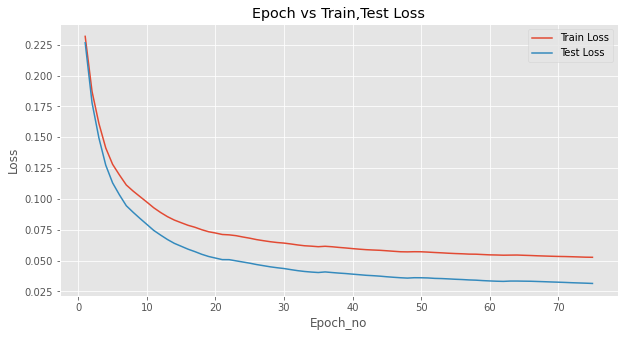

In [27]:
epochs = np.arange(1, epochs+1, 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Epoch vs Train,Test Loss')
plt.xlabel("Epoch_no")
plt.ylabel('Loss')
plt.legend()
print(100*'==')
